<a href="https://colab.research.google.com/github/nv-hiep/text_recognition/blob/main/ocr_handwriting_regconition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwriting Recognition with OCR (Optical character recognition)**

**Recognize numbers and Uppercase letters only:**

**'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'**

**'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'**

# 1. **Connect and authorize google drive with google colab:**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


## 1.1 **Open our project "Text Extraction" direct0ry in google drive:**

In [2]:
# %cd /content/gdrive/My Drive/
%cd /content/gdrive/My Drive/Colab Notebooks/text_extraction/
!ls

/content/gdrive/My Drive/Colab Notebooks/text_extraction
data		    ocr_handwriting.ipynb	      two_blobs_result.jpg
models		    OCR_with_Keras_Tensorflow.ipynb
ocr_data_gen.ipynb  text_extraction_from_image.ipynb


# 2. Import libraries

In [3]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use('Agg')

# import the necessary packages
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours

from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

import argparse
import imutils
import cv2

In [4]:
%matplotlib inline

# 3. Load pretrained Resnet model

The load_model utility from Keras and TensorFlow makes it super simple to load our serialized handwriting recognition model. Recall that our OCR model uses the ResNet deep learning architecture to classify each character corresponding to a digit 0-9 or a letter A-Z.

In [5]:
# load the handwriting OCR model
print('Loading handwriting OCR model...')
model = load_model('models/Handwriting.model')

Loading handwriting OCR model...


# 4. An Example of finding Bounding-boxes

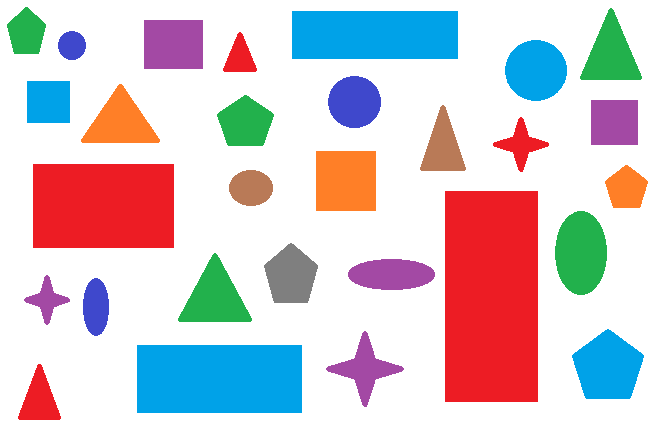

In [6]:
# Load image
imgs     = cv2.imread('data/shapes.png')
original = imgs.copy()

cv2_imshow(imgs)

In [7]:
# grayscale, Otsu's threshold 
gray   = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [8]:
# import cv2
# import numpy as np

# # Load image, grayscale, Otsu's threshold 
# image = cv2.imread('1.png')
# original = image.copy()
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Find contours, obtain bounding box, extract and save ROI
# ROI_number = 0
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     x,y,w,h = cv2.boundingRect(c)
#     cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
#     ROI = original[y:y+h, x:x+w]
#     cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
#     ROI_number += 1

# cv2.imshow('image', image)
# cv2.waitKey()

x, y, w, h:  18 364 43 56
x, y, w, h:  137 345 165 68
x, y, w, h:  326 331 78 76
x, y, w, h:  572 329 72 70
x, y, w, h:  83 278 26 58
x, y, w, h:  24 275 46 50
x, y, w, h:  348 259 87 31
x, y, w, h:  178 253 74 69
x, y, w, h:  264 243 54 60
x, y, w, h:  555 211 52 84
x, y, w, h:  445 191 93 211
x, y, w, h:  229 170 44 36
x, y, w, h:  605 165 43 43
x, y, w, h:  33 164 141 84
x, y, w, h:  316 151 60 60
x, y, w, h:  493 117 56 55
x, y, w, h:  420 105 46 66
x, y, w, h:  591 100 47 45
x, y, w, h:  217 95 57 51
x, y, w, h:  81 84 79 59
x, y, w, h:  27 81 43 42
x, y, w, h:  328 76 53 52
x, y, w, h:  505 40 62 61
x, y, w, h:  223 32 34 40
x, y, w, h:  58 31 28 29
x, y, w, h:  144 20 59 49
x, y, w, h:  292 11 166 48
x, y, w, h:  580 8 62 72
x, y, w, h:  7 7 39 47


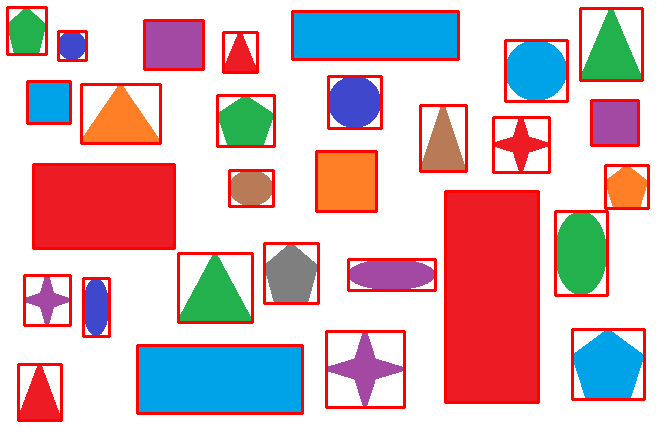

In [9]:
# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0

conts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
conts = conts[0] if len(conts) == 2 else conts[1]

for cntr in conts:
  x,y,w,h = cv2.boundingRect(cntr)
  cv2.rectangle(original, (x, y), (x+w, y+h), (0, 0, 255), 2)
  print('x, y, w, h: ', x, y, w, h)

  # cv2.imwrite('data/ROI_{}.png'.format(ROI_number), original)
  # cv2.imwrite('two_blobs_result.jpg', original)
  ROI_number += 1
# End - for
 
# save resulting image
# cv2.imwrite('two_blobs_result.jpg', original)

# show thresh and result    
# cv2.imshow("bounding_box", result)
cv2_imshow(original)

# 5. Text Regconition

## 5.1 Example 1

Since we’ve loaded our model from disk, let’s grab our image, pre-process it, and find character contours:

In [10]:
path = 'data/hello1.jpg'
image = cv2.imread(path)

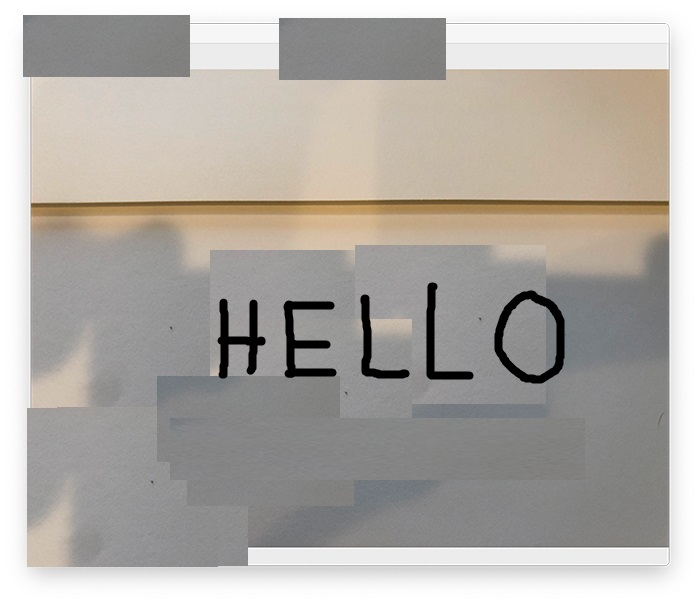

In [11]:
cv2_imshow(image)

In [12]:
# load the input image from disk, convert it to grayscale, and blur
# it to reduce noise
gray    = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

thresh  = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

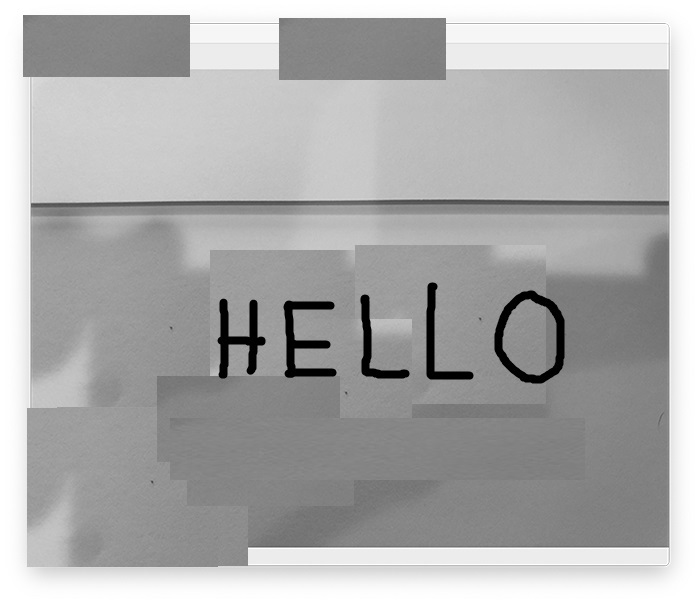

In [13]:
cv2_imshow(gray)

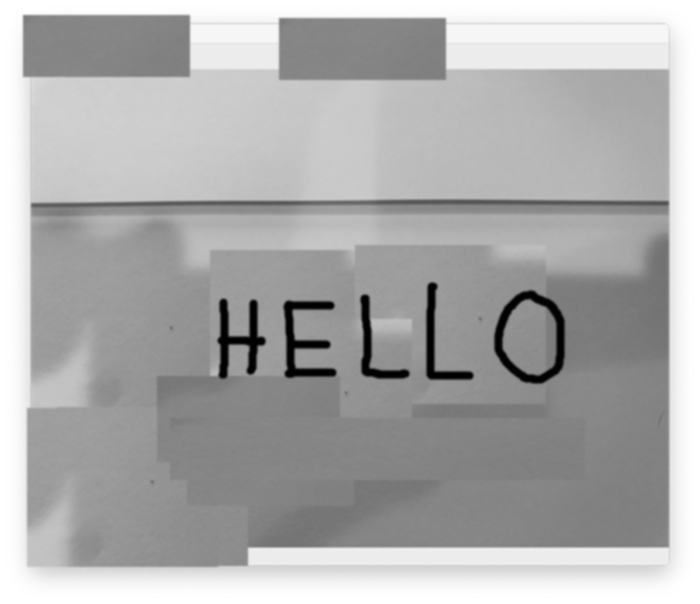

In [14]:
cv2_imshow(blurred)

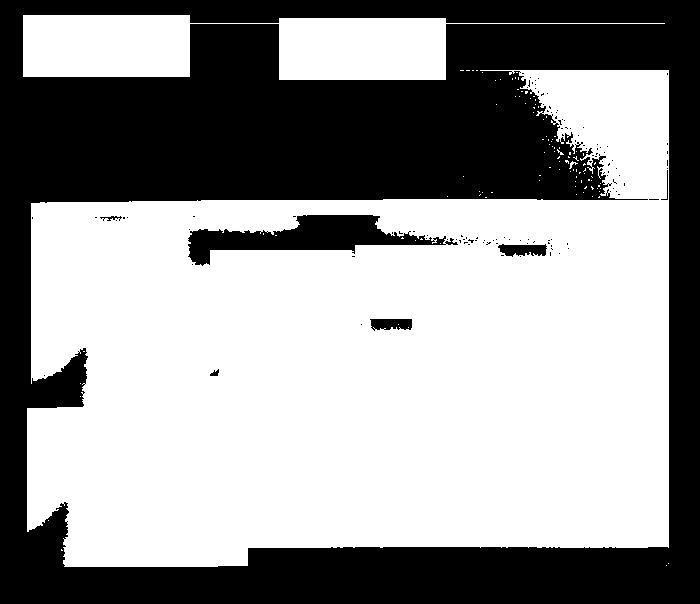

In [15]:
cv2_imshow(thresh)

In [16]:
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
# threshold1 = 30: It is the Low threshold value of intensity gradient.
# threshold2 = 150: It is the High threshold value of intensity gradient.
edged = cv2.Canny(blurred, 80, 150)
cnts  = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts  = imutils.grab_contours(cnts)
cnts  = sort_contours(cnts, method='left-to-right')[0]

# print( cnts )
print( 'Number of contours: {}'.format(len(cnts)) )

Number of contours: 12


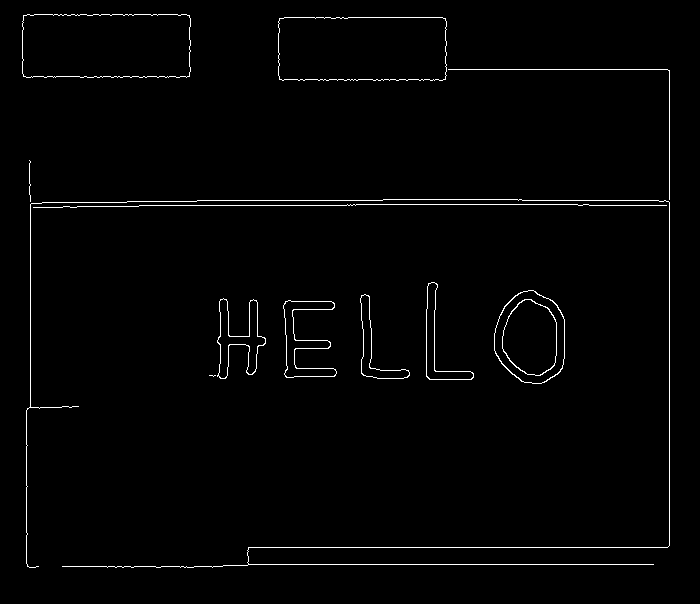

In [17]:
cv2_imshow(edged)

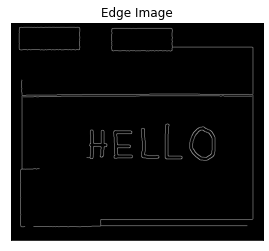

In [18]:
# Plot edges
plt.imshow(edged, cmap = 'gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])

plt.show()

In [19]:
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

# loop over the contours
for c in cnts:
  # compute the bounding box of the contour
  (x, y, w, h) = cv2.boundingRect(c)
  print( 'Bounding box (x, y, w, h): ', (x, y, w, h) )

  # filter out bounding boxes, ensuring they are neither too small nor too large
  # You may need to change these numbers according to your images/requirements
  if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
    # extract the character and threshold it to make the character
    # appear as *white* (foreground) on a *black* background, then
    # grab the width and height of the thresholded image
    roi      = gray[y:y + h, x:x + w]
    thresh   = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    (tH, tW) = thresh.shape

    # if the width is greater than the height, resize along the
    # width dimension
    if tW > tH:
      thresh = imutils.resize(thresh, width=32)
    # otherwise, resize along the height
    else:
      thresh = imutils.resize(thresh, height=32)

    # re-grab the image dimensions (now that its been resized)
    # and then determine how much we need to pad the width and
    # height such that our image will be 32x32
    (tH, tW) = thresh.shape
    dX = int(max(0, 32 - tW) / 2.0)
    dY = int(max(0, 32 - tH) / 2.0)

    # pad the image and force 32x32 dimensions
    padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY, left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,	value=(0, 0, 0))
    padded = cv2.resize(padded, (32, 32))

    # prepare the padded image for classification via our
    # handwriting OCR model
    padded = padded.astype('float32') / 255.
    padded = np.expand_dims(padded, axis=-1)

    # update our list of characters that will be OCR'd
    # package both the padded character and bounding box as a 2-tuple, and add it to our chars list
    chars.append((padded, (x, y, w, h)))
# End for

print('\n Number of characters: %d' % ( len(chars) ) )

Bounding box (x, y, w, h):  (22, 14, 169, 64)
Bounding box (x, y, w, h):  (26, 199, 644, 369)
Bounding box (x, y, w, h):  (29, 160, 2, 42)
Bounding box (x, y, w, h):  (33, 204, 634, 4)
Bounding box (x, y, w, h):  (209, 375, 7, 2)
Bounding box (x, y, w, h):  (217, 298, 49, 81)
Bounding box (x, y, w, h):  (278, 17, 169, 64)
Bounding box (x, y, w, h):  (283, 300, 54, 78)
Bounding box (x, y, w, h):  (360, 294, 50, 85)
Bounding box (x, y, w, h):  (426, 282, 48, 98)
Bounding box (x, y, w, h):  (448, 69, 222, 131)
Bounding box (x, y, w, h):  (494, 290, 71, 94)

 Number of characters: 5


With our extracted and prepared set of character ROIs completed, we can perform OCR:

In [20]:
# extract the bounding box locations and padded characters
# Remeber that: chars = ( padded, (x, y, w, h) ) --  padded character and bounding box
boxes = [x[1] for x in chars]
chars = np.array( [x[0] for x in chars], dtype='float32')

# OCR the characters using our handwriting recognition model
preds = model.predict(chars)

# define the list of label names
labels = '0123456789'
labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
labels = [x for x in labels]
print( labels )

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


H - 69.28%
E - 79.76%
L - 97.13%
L - 87.64%
0 - 98.20%


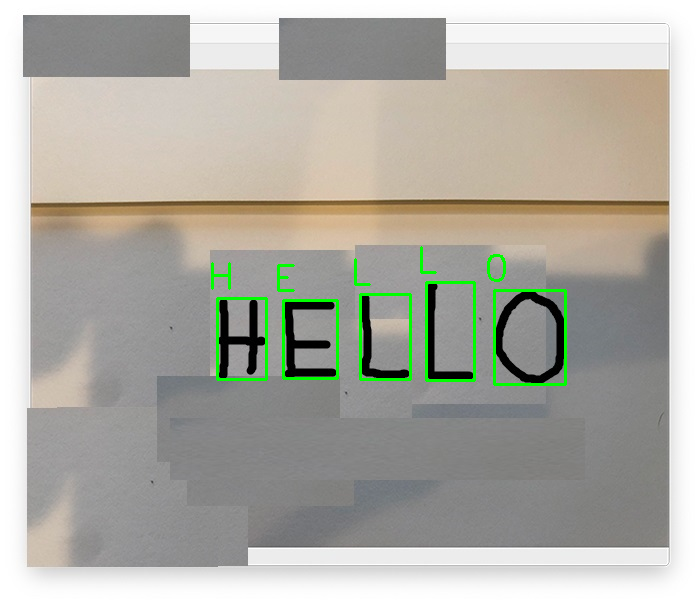

In [21]:
# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
  # find the index of the label with the largest corresponding
  # probability, then extract the probability and label
  i     = np.argmax(pred)
  prob  = pred[i]
  label = labels[i]

  # draw the prediction on the image
  print('{} - {:.2f}%'.format(label, prob * 100))

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  cv2.putText(image, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

# show the image
# cv2.imshow("Image", image)
cv2_imshow(image)
# cv2.waitKey(0)

## 5.2 Example 2

Since we’ve loaded our model from disk, let’s grab our image, pre-process it, and find character contours:

In [22]:
path = 'data/hello-world.jpg'
path = 'data/hello1.jpg'
path = 'data/text.jpg'
image = cv2.imread(path)

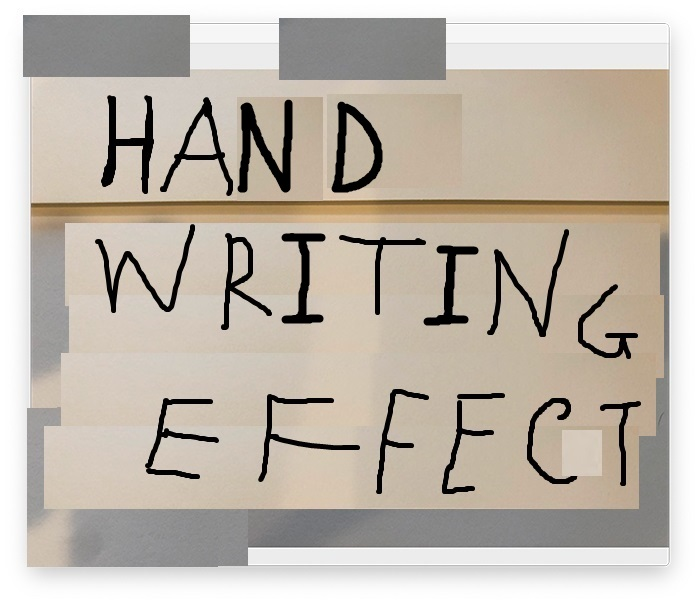

In [23]:
cv2_imshow(image)

In [24]:
# load the input image from disk, convert it to grayscale, and blur
# it to reduce noise
gray    = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

thresh  = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

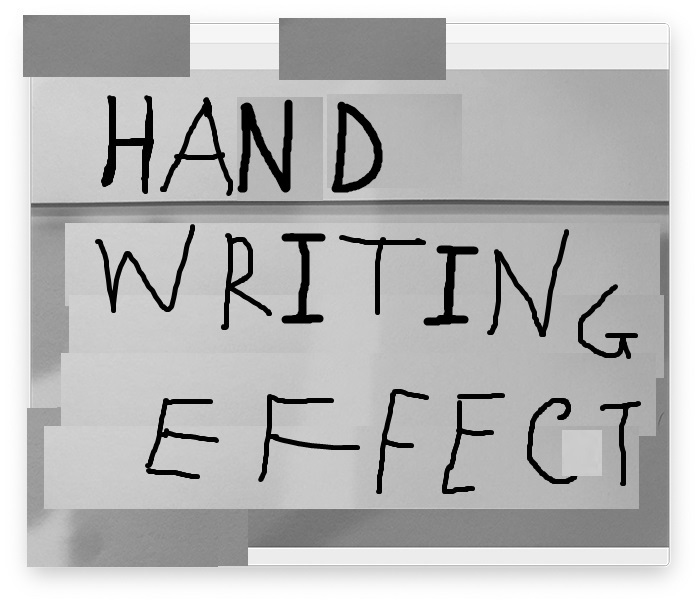

In [25]:
cv2_imshow(gray)

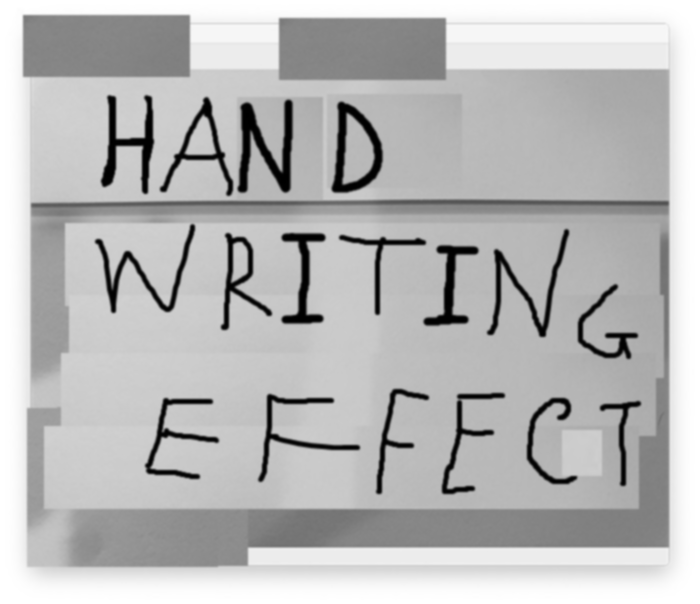

In [26]:
cv2_imshow(blurred)

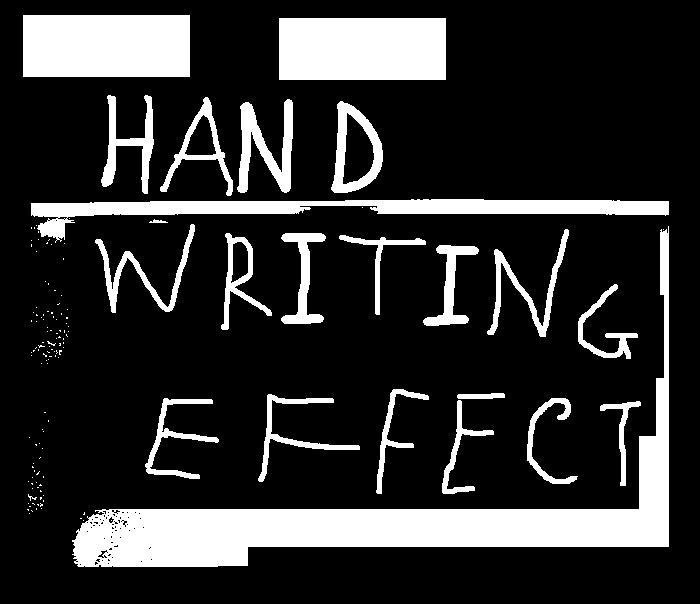

In [27]:
cv2_imshow(thresh)

In [28]:
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
# threshold1 = 30: It is the Low threshold value of intensity gradient.
# threshold2 = 150: It is the High threshold value of intensity gradient.
edged = cv2.Canny(blurred, 80, 150)
cnts  = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts  = imutils.grab_contours(cnts)
cnts  = sort_contours(cnts, method='left-to-right')[0]

# print( cnts )
print( 'Number of contours: {}'.format(len(cnts)) )

Number of contours: 25


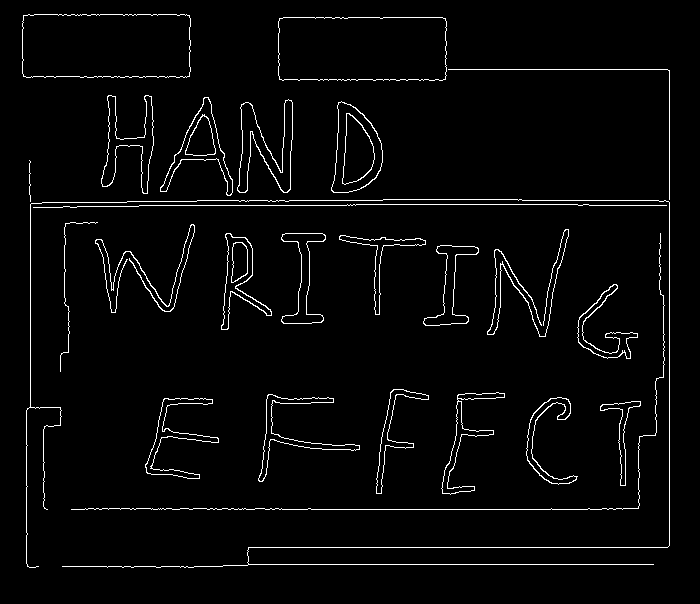

In [29]:
cv2_imshow(edged)

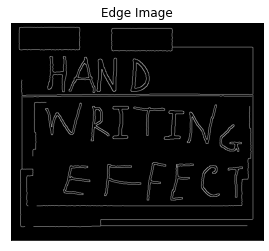

In [30]:
# Plot edges
plt.imshow(edged, cmap = 'gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])

plt.show()

In [31]:
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

# loop over the contours
for c in cnts:
  # compute the bounding box of the contour
  (x, y, w, h) = cv2.boundingRect(c)
  print( 'Bounding box (x, y, w, h): ', (x, y, w, h) )

  # filter out bounding boxes, ensuring they are neither too small nor too large
  # You may need to change these numbers according to your images/requirements
  if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
    # extract the character and threshold it to make the character
    # appear as *white* (foreground) on a *black* background, then
    # grab the width and height of the thresholded image
    roi      = gray[y:y + h, x:x + w]
    thresh   = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    (tH, tW) = thresh.shape

    # if the width is greater than the height, resize along the
    # width dimension
    if tW > tH:
      thresh = imutils.resize(thresh, width=32)
    # otherwise, resize along the height
    else:
      thresh = imutils.resize(thresh, height=32)

    # re-grab the image dimensions (now that its been resized)
    # and then determine how much we need to pad the width and
    # height such that our image will be 32x32
    (tH, tW) = thresh.shape
    dX = int(max(0, 32 - tW) / 2.0)
    dY = int(max(0, 32 - tH) / 2.0)

    # pad the image and force 32x32 dimensions
    padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY, left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,	value=(0, 0, 0))
    padded = cv2.resize(padded, (32, 32))

    # prepare the padded image for classification via our
    # handwriting OCR model
    padded = padded.astype('float32') / 255.
    padded = np.expand_dims(padded, axis=-1)

    # update our list of characters that will be OCR'd
    # package both the padded character and bounding box as a 2-tuple, and add it to our chars list
    chars.append((padded, (x, y, w, h)))
# End for

print('\n Number of characters: %d' % ( len(chars) ) )

Bounding box (x, y, w, h):  (22, 14, 169, 64)
Bounding box (x, y, w, h):  (26, 199, 644, 369)
Bounding box (x, y, w, h):  (29, 160, 2, 42)
Bounding box (x, y, w, h):  (33, 204, 634, 4)
Bounding box (x, y, w, h):  (60, 222, 38, 150)
Bounding box (x, y, w, h):  (71, 233, 594, 277)
Bounding box (x, y, w, h):  (95, 224, 100, 89)
Bounding box (x, y, w, h):  (101, 95, 53, 99)
Bounding box (x, y, w, h):  (145, 398, 74, 81)
Bounding box (x, y, w, h):  (160, 97, 73, 99)
Bounding box (x, y, w, h):  (221, 233, 51, 97)
Bounding box (x, y, w, h):  (237, 99, 56, 94)
Bounding box (x, y, w, h):  (258, 394, 102, 88)
Bounding box (x, y, w, h):  (278, 17, 169, 64)
Bounding box (x, y, w, h):  (281, 233, 45, 91)
Bounding box (x, y, w, h):  (331, 101, 52, 92)
Bounding box (x, y, w, h):  (339, 235, 87, 80)
Bounding box (x, y, w, h):  (376, 389, 53, 105)
Bounding box (x, y, w, h):  (423, 245, 56, 81)
Bounding box (x, y, w, h):  (441, 392, 64, 103)
Bounding box (x, y, w, h):  (448, 69, 222, 131)
Bounding box (

With our extracted and prepared set of character ROIs completed, we can perform OCR:

In [32]:
# extract the bounding box locations and padded characters
# Remeber that: chars = ( padded, (x, y, w, h) ) --  padded character and bounding box
boxes = [x[1] for x in chars]
chars = np.array( [x[0] for x in chars], dtype='float32')

# OCR the characters using our handwriting recognition model
preds = model.predict(chars)

# define the list of label names
labels = '0123456789'
labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
labels = [x for x in labels]
print( labels )

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


W - 73.98%
H - 69.46%
E - 79.60%
A - 66.76%
R - 86.31%
N - 96.34%
F - 83.91%
I - 72.89%
D - 99.67%
T - 94.82%
F - 92.34%
I - 87.18%
E - 50.11%
N - 60.10%
6 - 54.25%
G - 78.56%
7 - 49.69%


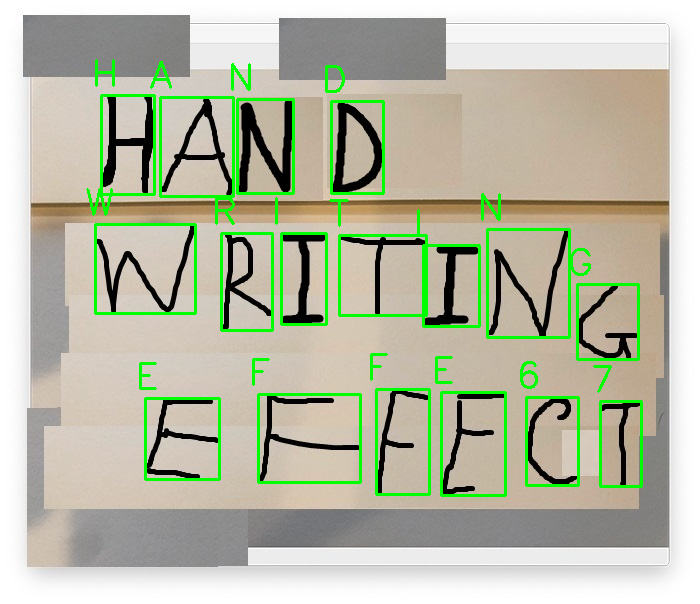

In [33]:
# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
  # find the index of the label with the largest corresponding
  # probability, then extract the probability and label
  i     = np.argmax(pred)
  prob  = pred[i]
  label = labels[i]

  # draw the prediction on the image
  print('{} - {:.2f}%'.format(label, prob * 100))

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  cv2.putText(image, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

# show the image
# cv2.imshow("Image", image)
cv2_imshow(image)
# cv2.waitKey(0)